In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a,c,k,e=sp.symbols('a c k e')

system_line=[sp.Eq(a-c,e*(k-a)),sp.Eq(c+a,e*(a+k))]
sp.solve(system_line,[c,k])
# sp.simplify(a-c-e*(k-a)-(c-a-e*(a-k)))
# sp.solve?
b=a*sp.sqrt(1-e**2) # 椭圆
c=a*e

sp.simplify(a**2-b**2-c**2)


0

In [5]:
b=a*sp.sqrt(e**2-1)
c**2-b**2-a**2 # 双曲线

a**2*e**2 - a**2*(e**2 - 1) - a**2

In [ ]:
x,y=sp.symbols('x y')
expr=x**2+y**2-4
sp.idiff(expr,y,x)#使用idff求解隐函数

-x/y

In [ ]:
# 手动计算隐函数微分,把y看成f(x)然后用链式法则
x=sp.S('x')
y=sp.symbols('f',cls=sp.Function)(x)

eq=sp.Eq(x**2+y**2,4)
de=sp.diff(eq.lhs,x)-sp.diff(eq.rhs,x)

s,*_=sp.solve(de,sp.diff(y,x))


-x/f(x)

---

### **参数方程学习大纲 (Parametric Equations Outline)**

#### **第一部分：基础概念与入门 (The Fundamentals)**

1.  **什么是参数方程 (What is it?)**
    * **定义**: 用一个独立的变量（参数，通常是 `t`）来分别描述每个坐标 (`x`, `y`, 甚至 `z`) 是如何变化的。
    * **核心思想**: 从描述**静态形状** (如 $y=f(x)$) 转变为描述**动态过程**或**运动轨迹**。
    * **关键要素**:
        * $x = f(t)$
        * $y = g(t)$
        * 参数 `t` 的取值范围 (e.g., $a \le t \le b$)

2.  **为什么需要参数方程 (Why do we need it?)**
    * **引入“时间”与“方向”**: 这是与笛卡尔方程最根本的区别。它能告诉我们物体**何时**在**何地**，以及运动的**方向**。
    * **描述复杂曲线**:
        * 轻松描述无法通过“垂直线检验”的曲线 (如圆、摆线)。
        * 描述非函数关系的路径 (如一个粒子来回移动的路径)。
    * **物理与工程应用**: 完美契合描述**抛体运动**、行星轨道、机械臂运动等依赖于时间 `t` 的场景。

3.  **绘制参数曲线 (Sketching)**
    * **点描法**:
        1.  建立 `t`, `x`, `y` 的表格。
        2.  选取一系列 `t` 值，计算出对应的 `(x, y)` 坐标。
        3.  在坐标系中描点。
        4.  **非常重要的一步**: 用箭头在曲线上标出随着 `t` 增大，曲线生成的**方向 (Orientation)**。

---

#### **第二部分：方程形式的转换 (Switching Forms)**

1.  **参数方程 → 笛卡尔方程 (Eliminating the Parameter)**
    * **核心目标**: **消去参数 `t`**，找到 `x` 和 `y` 之间的直接关系。
    * **常用技巧**:
        * **代入法**: 从一个方程中解出 `t` (e.g., $t = x-1$)，然后代入另一个方程。这是最基本的方法。
        * **利用恒等式 (尤其重要)**:
            * **三角恒等式**: 当遇到 `sin(t)` 和 `cos(t)` 时，几乎总是使用 $\sin^2(t) + \cos^2(t) = 1$。这是处理圆和椭圆的标准方法。
            * 其他恒等式：$\sec^2(t) - \tan^2(t) = 1$ 等。
    * **注意**: 转换为笛卡尔方程后可能会**丢失信息**，比如曲线的定义域、值域限制或运动方向。

2.  **笛卡尔方程 → 参数方程 (Parameterization)**
    * **核心思想**: 这是一个创造性的过程，**答案不唯一**。
    * **常用技巧**:
        * **平凡参数化**: 对于函数 $y=f(x)$，最简单的参数化是令 **$x=t$**，则 $y=f(t)$。
        * **几何结构参数化**:
            * **圆**: $x^2 + y^2 = r^2 \implies x = r\cos(t), y = r\sin(t)$。
            * **椭圆**: $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 \implies x = a\cos(t), y = b\sin(t)$。

---

#### **第三部分：参数方程的微积分 (Calculus with Parametric Equations) - 核心重点**

⭐ **这部分是参数方程理论的精髓，它让我们能量化分析曲线的动态特性。**

1.  **一阶导数与切线 (Derivatives & Tangent Lines)**
    * **斜率公式**: 如何求 $\frac{dy}{dx}$？利用链式法则推导：
        $$
        \frac{dy}{dx} = \frac{dy/dt}{dx/dt} \quad (\text{前提是 } dx/dt \neq 0)
        $$
    * **应用**:
        * 求在特定点 (或特定 `t` 值) 的**切线斜率**。
        * **水平切线**: 寻找使 **$dy/dt = 0$** 且 $dx/dt \neq 0$ 的 `t` 值。
        * **垂直切线**: 寻找使 **$dx/dt = 0$** 且 $dy/dt \neq 0$ 的 `t` 值。

2.  **二阶导数与凹凸性 (Second Derivatives & Concavity)**
    * **公式 (极易出错!)**: 二阶导数是**对一阶导数关于 `x` 求导**，而不是 `t`！
        $$
        \frac{d^2y}{dx^2} = \frac{d}{dx}\left(\frac{dy}{dx}\right) = \frac{\frac{d}{dt}\left(\frac{dy}{dx}\right)}{\frac{dx}{dt}}
        $$
    * **步骤**:
        1.  先求出 $\frac{dy}{dx}$ (一个关于 `t` 的函数)。
        2.  将这个函数对 `t` 求导。
        3.  再除以 $\frac{dx}{dt}$。
    * **应用**: 判断曲线的凹凸性 (大于0上凹，小于0下凹)。

3.  **弧长 (Arc Length)**
    * **思想**: 将曲线分成无限小的线段，每个线段的长度用勾股定理 $ds = \sqrt{dx^2 + dy^2}$ 计算，然后积分。
    * **公式**:
        $$
        L = \int_{a}^{b} \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2} \, dt
        $$
    * 这实际上是计算粒子在 `t` 从 `a` 到 `b` 这段时间内走过的**总路程**。

4.  **旋转体表面积 (Surface Area of Revolution)**
    * **思想**: 将弧长公式中的微小弧长 $ds$ 乘以它旋转所形成的圆周 $2\pi r$。
    * **绕 x 轴旋转**: 半径是 $y$ 值，即 $r = y(t)$。
        $$
        S = \int_{a}^{b} 2\pi y(t) \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2} \, dt
        $$
    * **绕 y 轴旋转**: 半径是 $x$ 值，即 $r = x(t)$。
        $$
        S = \int_{a}^{b} 2\pi x(t) \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2} \, dt
        $$

---

#### **第四部分：著名曲线与应用实例 (Famous Curves & Applications)**

1.  **经典曲线案例**:

    * **圆与椭圆**: 最基础的参数化。
    * **摆线 (Cycloid)**: 滚动的轮子边缘上一点的轨迹。它具有“最速降线”和“等时降线”的奇妙物理性质。
    * **星形线 (Astroid)**: 一个小圆在一个大圆内部滚动时，小圆上一点的轨迹。
    * **利萨茹曲线 (Lissajous Curves)**: 由相互垂直的简谐振动合成的曲线，在示波器上很常见。

2.  **应用领域**:
    * **物理学**: 抛体运动、轨道力学。
    * **计算机图形学**: 贝塞尔曲线 (Bézier Curves) 用于字体设计、矢量图软件 (Adobe Illustrator, Figma) 和动画路径。
    * **机器人学**: 规划机械臂的末端执行器 (手) 的运动路径。

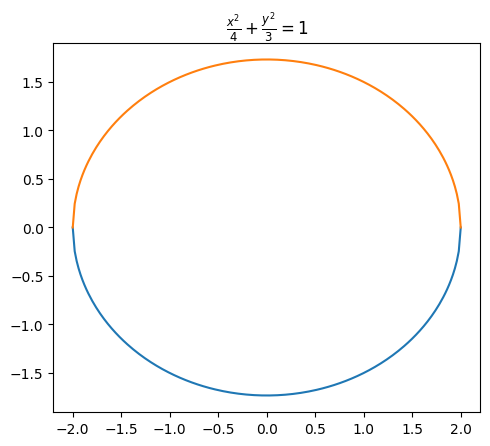

In [4]:
x,y=sp.symbols('x y')
eclipse=x**2/4+y**2/3-1
sol_y=sp.solve(eclipse,y)
f1=sp.lambdify(x,sol_y[0])
f2=sp.lambdify(x,sol_y[1])
xx=np.linspace(-2,2,200)
plt.plot(xx,f1(xx))
plt.plot(xx,f2(xx))
plt.title(r'$\frac{x^2}{4}+\frac{y^2}{3}=1$')

ax=plt.gca()
ax.set_aspect('equal')
# from  sympy.calculus.util import continuous_domain
# continuous_domain(sol_y[0],x,sp.S.Reals)


In [ ]:
sp.Poly(12*eclipse).terms()
sp.Poly(12*eclipse) # x,y
sp.fraction(eclipse)

(x**2/4 + y**2/3 - 1, 1)

In [ ]:
sp.Poly(12*eclipse).terms()

[((2, 0), 3), ((0, 2), 4), ((0, 0), -12)]

In [21]:
sp.Poly(eclipse).clear_denoms()

(12, Poly(3*x**2 + 4*y**2 - 12, x, y, domain='QQ'))

In [36]:
A,B,C,D,E,F,x,y=sp.symbols('A,B,C,D,E,F,x,y')
expr=A*x**2+B*x*y+C*y**2+D*x+E*y+F
e,u,v=sp.symbols('e,u,v')
xx=u*sp.cos(e)-v*sp.sin(e)
yy=u*sp.sin(e)+v*sp.cos(e)

expr_expand=sp.expand(expr.subs({x:xx,y:yy}))
# sp.solve(sp.simplify(expr_expand),)

sp.trigsimp(expr_expand)

A*u**2*cos(2*e)/2 + A*u**2/2 - A*u*v*sin(2*e) - A*v**2*cos(2*e)/2 + A*v**2/2 + B*u**2*sin(2*e)/2 + B*u*v*cos(2*e) - B*v**2*sin(2*e)/2 - C*u**2*cos(2*e)/2 + C*u**2/2 + C*u*v*sin(2*e) + C*v**2*cos(2*e)/2 + C*v**2/2 + D*u*cos(e) - D*v*sin(e) + E*u*sin(e) + E*v*cos(e) + F

In [43]:
b=sp.trigsimp(expr_expand).coeff(u*v)
sp.collect(b,sp.sin(2*e))

B*cos(2*e) + (-A + C)*sin(2*e)

In [37]:
expr.subs({x:xx,y:yy})

A*(u*cos(e) - v*sin(e))**2 + B*(u*sin(e) + v*cos(e))*(u*cos(e) - v*sin(e)) + C*(u*sin(e) + v*cos(e))**2 + D*(u*cos(e) - v*sin(e)) + E*(u*sin(e) + v*cos(e)) + F

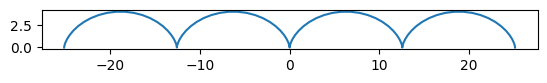

In [20]:

# 摆线
a=2
t=np.linspace(-2*a*np.pi,2*a*np.pi,101)
x=a*t-a*np.sin(t)
y=a-a*np.cos(t)

fig,ax=plt.subplots()
ax.set_aspect('equal')
ax.plot(x,y)

In [39]:
sp.solve([xx-x,yy-y],(u,v))

{u: x*cos(e)/(sin(e)**2 + cos(e)**2) + y*sin(e)/(sin(e)**2 + cos(e)**2),
 v: -x*sin(e)/(sin(e)**2 + cos(e)**2) + y*cos(e)/(sin(e)**2 + cos(e)**2)}

In [19]:
# 圆的二次方程
x,y=sp.symbols('x y')
circle=(x-3)**2+(y-3)**2-25
sp.expand(circle).as_ordered_terms()


[x**2, -6*x, y**2, -6*y, -7]

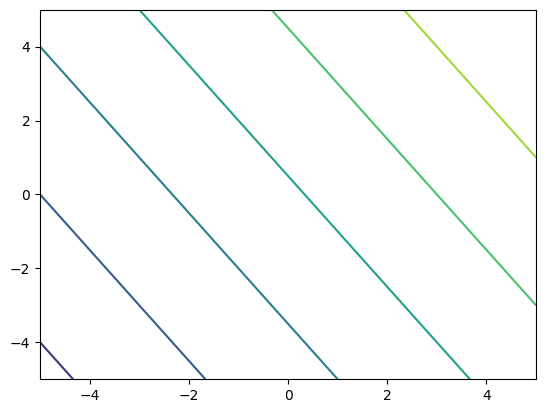

In [ ]:
# 3x+2y-z-25
x=np.linspace(-5,5,101)
y=np.linspace(-5,5,101)
XX,YY=np.meshgrid(x,y)
z=3*XX+2*YY-25
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_wireframe(XX,YY,z)

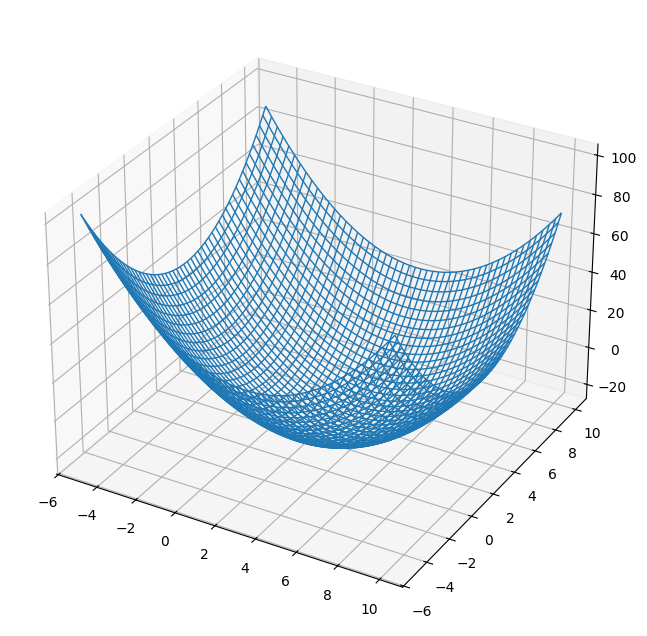

In [ ]:
# 利用等高线完整二次方程可视化
x = np.linspace(-5, 10, 400)
y = np.linspace(-5, 10, 400)
X, Y = np.meshgrid(x, y)
F = (X-3)**2 + (Y-3)**2 - 25

fig,ax=plt.subplots(figsize=(8, 8),subplot_kw={'projection':'3d'})
ax.plot_wireframe(X, Y, F, linewidths=1)

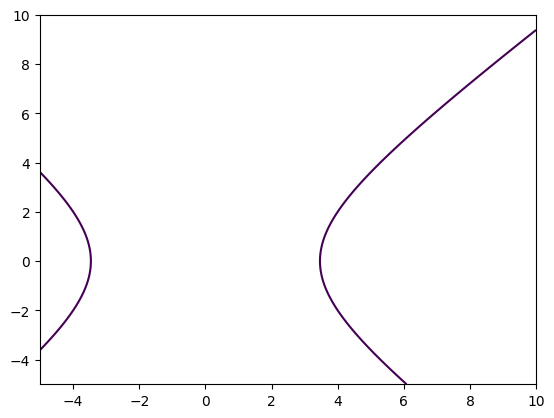

In [12]:
eclipse=X**2-Y**2-12
plt.contour(X,Y,eclipse,levels=[0])